In [4]:
import import_ipynb #allows import of other jupyter notebooks
import pickle #used to save object (data persistence)
from openpyxl import Workbook, load_workbook #allows access to excel program
from openpyxl.utils.dataframe import dataframe_to_rows #access to each sheets in the excel file
from openpyxl.utils import get_column_letter #allows access to letters of each column
import numpy as np
import os #access to operating system but our purposes are for directory access

class Bacteria(object):
    
    def __init__(self, seed, conc, domain, size_x, size_y):
        ''' Features
            bacteria surface positions at (0,0)
        '''
        ''' Inputs
            seed - generated randomness
            surface - needs matrix surface array created from main_surface.ipynb
            conc - user-input concentration of positive charge, ranges from 0 - 1 (assume less than 0.5)
            domain - shape of domains (single, diamond, long, small, large)
            size_x/size_y - size of flat area (ex. size_x by size_y points), must be integers, cannot be greater than 500
        '''
        ''' Attributes
        
        '''
        ''' Outputs
            New matrix space with surface and bacteria
        '''
        self.seed = seed
        np.random.seed(seed) #sets specific random state
        #active.cell(self.seed, 2, self.seed)
        self.size_x = size_x
        self.size_y = size_y
        total = size_x * size_y #total number of points on bacteria surface
        #creating domain sizes for bacteria surface
        if domain == "single":
            self.bact_1d = np.random.choice([1, -1], size = total, p = [conc, 1-conc]) #creating 1D array of randomized bacteria surface
            self.bact_2d = np.reshape(self.bact_1d, (-1, size_y)) #reshape 1D array to 2D
        elif domain == "cross":
            #size of cross are 5 points
            #first, make the bacteria surface negative
            self.bact_1d = np.ones((total))
            self.bact_1d[self.bact_1d == 1] = -1
            #second, add proportional number of positive domains
            num_domains = int((total*conc)/5)
            dom = 0
            while dom < num_domains:
                index = np.random.randint(size_y, total - size_y - 2) #randomly pick an index
                if index % size_y == 0 or index+1 % size_y == 0 or index-1 % size_y == 0:
                    continue

                elif self.bact_1d[index - size_y] == 1 or \
                     self.bact_1d[index + size_y] == 1:
                    continue

                dom_bool = False
                for i in range(-1, 2):
                    if self.bact_1d[index + i] == 1:
                        dom_bool = True

                if dom_bool:
                    continue
                else:
                    for i in range(-1, 2):
                        self.bact_1d[index+i] = 1
                    self.bact_1d[index+size_y] = 1
                    self.bact_1d[index-size_y] = 1
                    dom += 1
            
        elif domain == "small": 
            #size of small domains are 12pts (a filled octagon)
            #first, make the bacteria surface negative
            self.bact_1d = np.ones((total))
            self.bact_1d[self.bact_1d == 1] = -1
            #second, add proportional number of positive domains
            num_domains = int((total*conc)/12)
            dom = 0
            while dom < num_domains:
                index = np.random.randint(size_y, total - (size_y*2)-2) #randomly pick an index
                if index % size_y == 0 or index+1 % size_y == 0 or index+2 % size_y == 0 or index-1 % size_y == 0:
                    continue
                
                dom_bool = False
                for i  in range(-1, 3):
                    if self.bact_1d[index + i] == 1:
                        dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 2):
                        if self.bact_1d[index - size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 3):
                        if self.bact_1d[index + size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 2):
                        if self.bact_1d[index + (size_y*2) + i] == 1:
                            dom_bool = True
                
                if dom_bool:
                    continue
                else:
                    for i  in range(-1, 3):
                        self.bact_1d[index + i] = 1
                    for i  in range(0, 2):
                        self.bact_1d[index - size_y + i] = 1    
                    for i  in range(-1, 3):
                        self.bact_1d[index + size_y + i] = 1
                    for i  in range(0, 2):
                        self.bact_1d[index +(size_y*2)+ i] = 1
                    dom += 1
            
        elif domain == "medium":
            #size of medium domains are 25pts (a filled diamond/rhombus)
            #first, make the bacteria surface negative
            self.bact_1d = np.ones((total))
            self.bact_1d[self.bact_1d == 1] = -1
            #second, add proportional number of positive domains
            num_domains = int((total*conc)/25)
            dom = 0
            while dom < num_domains:
                index = np.random.randint(size_y*2, total - (size_y*4)-2) #randomly pick an index
                if index % size_y == 0 or index+1 % size_y == 0 or index+2 % size_y == 0 or \
                index+3 % size_y == 0 or index+4 % size_y == 0 or index-1 %size_y == 0 or \
                index-2 % size_y == 0:
                    continue
                dom_bool = False
                for i  in range(-1, 4):
                    if self.bact_1d[index + i] == 1:
                        dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 3):
                        if self.bact_1d[index - size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 5):
                        if self.bact_1d[index + size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 4):
                        if self.bact_1d[index + (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 2):
                        if self.bact_1d[index - (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 3):
                        if self.bact_1d[index + (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 2):
                        if self.bact_1d[index + (size_y*4) + i] == 1:
                            dom_bool = True
                
                if dom_bool:
                    continue
                else:
                    for i  in range(-1, 4):
                        self.bact_1d[index + i] = 1
                    for i  in range(0, 3):
                        self.bact_1d[index - size_y + i] = 1    
                    for i  in range(-2, 5):
                        self.bact_1d[index + size_y + i] = 1
                    for i  in range(-1, 4):
                        self.bact_1d[index +(size_y*2)+ i] = 1
                    for i  in range(1, 2):
                        self.bact_1d[index -(size_y*2)+ i] = 1
                    for i  in range(0, 3):
                        self.bact_1d[index +(size_y*3)+ i] = 1
                    for i  in range(1, 2):
                        self.bact_1d[index +(size_y*4)+ i] = 1
                    dom += 1
                    
        elif domain == "large":
            #size of large domains are 40pts (a filled octagon)
            #first, make the bacteria surface negative
            self.bact_1d = np.ones((total))
            self.bact_1d[self.bact_1d == 1] = -1
            #second, add proportional number of positive domains
            num_domains = int((total*conc)/40)
            dom = 0
            while dom < num_domains:
                index = np.random.randint(size_y*2, total - (size_y*5)-2) #randomly pick an index
                if index % size_y == 0 or index+1 % size_y == 0 or index+2 % size_y == 0 or \
                index+3 % size_y == 0 or index+4 % size_y == 0 or index-1 %size_y == 0 or index+5 % size_y == 0 or \
                index-2 % size_y == 0:
                    continue
                dom_bool = False
                for i  in range(-1, 5):
                    if self.bact_1d[index + i] == 1:
                        dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index - size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index + size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index + (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index - (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index + (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index + (size_y*4) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index + (size_y*5) + i] == 1:
                            dom_bool = True
                
                if dom_bool:
                    continue
                else:
                    for i  in range(-1, 5):
                        self.bact_1d[index + i] = 1
                    for i  in range(0, 4):
                        self.bact_1d[index - size_y + i] = 1    
                    for i  in range(-2, 6):
                        self.bact_1d[index + size_y + i] = 1
                    for i  in range(-2, 6):
                        self.bact_1d[index +(size_y*2)+ i] = 1
                    for i  in range(1, 3):
                        self.bact_1d[index -(size_y*2)+ i] = 1
                    for i  in range(-1, 5):
                        self.bact_1d[index +(size_y*3)+ i] = 1
                    for i  in range(0, 4):
                        self.bact_1d[index +(size_y*4)+ i] = 1
                    for i  in range(1, 3):
                        self.bact_1d[index +(size_y*5)+ i] = 1
                    dom += 1
                    
        elif domain == "xlarge":
            #size of large is 60 points
            #first, make the bacteria surface negative
            self.bact_1d = np.ones((total))
            self.bact_1d[self.bact_1d == 1] = -1
            #second, add proportional number of positive domains
            num_domains = int((total*conc)/60)
            dom = 0
            while dom < num_domains:
                index = np.random.randint(size_y*3, total - (size_y*6)-2) #randomly pick an index
                if index % size_y == 0 or index+1 % size_y == 0 or index+2 % size_y == 0 or \
                index+3 % size_y == 0 or index+4 % size_y == 0 or index-1 %size_y == 0 or index+5 % size_y == 0 or \
                index-2 % size_y == 0 or index+6 % size_y == 0 or index-3 % size_y == 0:
                    continue
                dom_bool = False
                for i  in range(-2, 6):
                    if self.bact_1d[index + i] == 1:
                        dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index - size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-3, 7):
                        if self.bact_1d[index + size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-3, 7):
                        if self.bact_1d[index + (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index - (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index + (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index - (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index + (size_y*4) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index + (size_y*5) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index + (size_y*6) + i] == 1:
                            dom_bool = True
                
                if dom_bool:
                    continue
                else:
                    for i  in range(-2, 6):
                        self.bact_1d[index + i] = 1
                    for i  in range(-1, 5):
                        self.bact_1d[index - size_y + i] = 1    
                    for i  in range(-3, 7):
                        self.bact_1d[index + size_y + i] = 1
                    for i  in range(-3, 7):
                        self.bact_1d[index +(size_y*2)+ i] = 1
                    for i  in range(0, 4):
                        self.bact_1d[index -(size_y*2)+ i] = 1
                    for i  in range(-2, 6):
                        self.bact_1d[index +(size_y*3)+ i] = 1
                    for i  in range(1, 3):
                        self.bact_1d[index -(size_y*3)+ i] = 1
                    for i  in range(-1, 5):
                        self.bact_1d[index +(size_y*4)+ i] = 1
                    for i  in range(0, 4):
                        self.bact_1d[index +(size_y*5)+ i] = 1
                    for i  in range(1, 3):
                        self.bact_1d[index +(size_y*6)+ i] = 1
                    dom += 1
                    
        elif domain == "xxlarge":
            #size of large is 84 points
            #first, make the bacteria surface negative
            self.bact_1d = np.ones((total))
            self.bact_1d[self.bact_1d == 1] = -1
            #second, add proportional number of positive domains
            num_domains = int((total*conc)/84)
            dom = 0
            while dom < num_domains:
                index = np.random.randint(size_y*4, total - (size_y*7)-2) #randomly pick an index
                if index % size_y == 0 or index+1 % size_y == 0 or index+2 % size_y == 0 or \
                index+3 % size_y == 0 or index+4 % size_y == 0 or index-1 %size_y == 0 or index+5 % size_y == 0 or \
                index-2 % size_y == 0 or index+6 % size_y == 0 or index-3 % size_y == 0 or index+7 % size_y == 0 or \
                index-4 % size_y == 0:
                    continue
                dom_bool = False
                for i in range(-3, 7):
                    if self.bact_1d[index + i] == 1:
                        dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index - size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-4, 8):
                        if self.bact_1d[index + size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-4, 8):
                        if self.bact_1d[index + (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index - (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-3, 7):
                        if self.bact_1d[index + (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index - (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index + (size_y*4) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index - (size_y*4) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index + (size_y*5) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index + (size_y*6) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index + (size_y*7) + i] == 1:
                            dom_bool = True
                
                if dom_bool:
                    continue
                else:
                    for i in range(-3, 7):
                        self.bact_1d[index + i] = 1
                    for i in range(-2, 6):
                        self.bact_1d[index - size_y + i] = 1    
                    for i in range(-4, 8):
                        self.bact_1d[index + size_y + i] = 1
                    for i in range(-4, 8):
                        self.bact_1d[index +(size_y*2)+ i] = 1
                    for i in range(-1, 5):
                        self.bact_1d[index -(size_y*2)+ i] = 1
                    for i in range(-3, 7):
                        self.bact_1d[index +(size_y*3)+ i] = 1
                    for i in range(0, 4):
                        self.bact_1d[index -(size_y*3)+ i] = 1
                    for i in range(-2, 6):
                        self.bact_1d[index +(size_y*4)+ i] = 1
                    for i in range(1, 3):
                        self.bact_1d[index -(size_y*4)+ i] = 1
                    for i in range(-1, 5):
                        self.bact_1d[index +(size_y*5)+ i] = 1
                    for i in range(0, 4):
                        self.bact_1d[index +(size_y*6)+ i] = 1
                    for i in range(1, 3):
                        self.bact_1d[index +(size_y*7)+ i] = 1
                    dom += 1
                    
        elif domain == "xxxlarge":
            #size of large is 112 points
            #first, make the bacteria surface negative
            self.bact_1d = np.ones((total))
            self.bact_1d[self.bact_1d == 1] = -1
            #second, add proportional number of positive domains
            num_domains = int((total*conc)/112)
            dom = 0
            while dom < num_domains:
                index = np.random.randint(size_y*5, total - (size_y*8)-2) #randomly pick an index
                if index % size_y == 0 or index+1 % size_y == 0 or index+2 % size_y == 0 or \
                index+3 % size_y == 0 or index+4 % size_y == 0 or index-1 %size_y == 0 or index+5 % size_y == 0 or \
                index-2 % size_y == 0 or index+6 % size_y == 0 or index-3 % size_y == 0 or index+7 % size_y == 0 or \
                index-4 % size_y == 0 or index+8 % size_y == 0 or index-5 % size_y == 0:
                    continue
                dom_bool = False
                for i in range(-4, 8):
                    if self.bact_1d[index + i] == 1:
                        dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-3, 7):
                        if self.bact_1d[index - size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-5, 9):
                        if self.bact_1d[index + size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-5, 9):
                        if self.bact_1d[index + (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index - (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-4, 8):
                        if self.bact_1d[index + (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index - (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-3, 7):
                        if self.bact_1d[index + (size_y*4) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index - (size_y*4) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index + (size_y*5) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index - (size_y*5) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index + (size_y*6) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index + (size_y*7) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index + (size_y*8) + i] == 1:
                            dom_bool = True
                
                if dom_bool:
                    continue
                else:
                    for i in range(-4, 8):
                        self.bact_1d[index + i] = 1
                    for i in range(-3, 7):
                        self.bact_1d[index - size_y + i] = 1    
                    for i in range(-5, 9):
                        self.bact_1d[index + size_y + i] = 1
                    for i in range(-5, 9):
                        self.bact_1d[index +(size_y*2)+ i] = 1
                    for i in range(-2, 6):
                        self.bact_1d[index -(size_y*2)+ i] = 1
                    for i in range(-4, 8):
                        self.bact_1d[index +(size_y*3)+ i] = 1
                    for i in range(-1, 5):
                        self.bact_1d[index -(size_y*3)+ i] = 1
                    for i in range(-3, 7):
                        self.bact_1d[index +(size_y*4)+ i] = 1
                    for i in range(0, 4):
                        self.bact_1d[index -(size_y*4)+ i] = 1
                    for i in range(-2, 6):
                        self.bact_1d[index +(size_y*5)+ i] = 1
                    for i in range(1, 3):
                        self.bact_1d[index -(size_y*5)+ i] = 1
                    for i in range(-1, 5):
                        self.bact_1d[index +(size_y*6)+ i] = 1
                    for i in range(0, 4):
                        self.bact_1d[index +(size_y*7)+ i] = 1
                    for i in range(1, 3):
                        self.bact_1d[index +(size_y*8)+ i] = 1
                    dom += 1
                    
        elif domain == "x4large":
            #size of large is 144 points
            #first, make the bacteria surface negative
            self.bact_1d = np.ones((total))
            self.bact_1d[self.bact_1d == 1] = -1
            #second, add proportional number of positive domains
            num_domains = int((total*conc)/144)
            dom = 0
            while dom < num_domains:
                index = np.random.randint(size_y*6, total - (size_y*9)-2) #randomly pick an index
                if index % size_y == 0 or index+1 % size_y == 0 or index+2 % size_y == 0 or \
                index+3 % size_y == 0 or index+4 % size_y == 0 or index-1 %size_y == 0 or index+5 % size_y == 0 or \
                index-2 % size_y == 0 or index+6 % size_y == 0 or index-3 % size_y == 0 or index+7 % size_y == 0 or \
                index-4 % size_y == 0 or index+8 % size_y == 0 or index-5 % size_y == 0 or index+9 % size_y == 0 or \
                index-6 % size_y == 0:
                    continue
                dom_bool = False
                for i in range(-5, 9):
                    if self.bact_1d[index + i] == 1:
                        dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-4, 8):
                        if self.bact_1d[index - size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-6, 10):
                        if self.bact_1d[index + size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-6, 10):
                        if self.bact_1d[index + (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-3, 7):
                        if self.bact_1d[index - (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-5, 9):
                        if self.bact_1d[index + (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index - (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-4, 8):
                        if self.bact_1d[index + (size_y*4) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index - (size_y*4) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-3, 7):
                        if self.bact_1d[index + (size_y*5) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index - (size_y*5) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index + (size_y*6) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index - (size_y*6) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index + (size_y*7) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index + (size_y*8) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index + (size_y*9) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-5, 9):
                        self.bact_1d[index + i] = 1
                    for i in range(-4, 8):
                        self.bact_1d[index - size_y + i] = 1    
                    for i in range(-6, 10):
                        self.bact_1d[index + size_y + i] = 1
                    for i in range(-6, 10):
                        self.bact_1d[index +(size_y*2)+ i] = 1
                    for i in range(-3, 7):
                        self.bact_1d[index -(size_y*2)+ i] = 1
                    for i in range(-5, 9):
                        self.bact_1d[index +(size_y*3)+ i] = 1
                    for i in range(-2, 6):
                        self.bact_1d[index -(size_y*3)+ i] = 1
                    for i in range(-4, 8):
                        self.bact_1d[index +(size_y*4)+ i] = 1
                    for i in range(-1, 5):
                        self.bact_1d[index -(size_y*4)+ i] = 1
                    for i in range(-3, 7):
                        self.bact_1d[index +(size_y*5)+ i] = 1
                    for i in range(0, 4):
                        self.bact_1d[index -(size_y*5)+ i] = 1
                    for i in range(-2, 6):
                        self.bact_1d[index +(size_y*6)+ i] = 1
                    for i in range(1, 3):
                        self.bact_1d[index -(size_y*6)+ i] = 1
                    for i in range(-1, 5):
                        self.bact_1d[index +(size_y*7)+ i] = 1
                    for i in range(0, 4):
                        self.bact_1d[index +(size_y*8)+ i] = 1
                    for i in range(1, 3):
                        self.bact_1d[index +(size_y*9)+ i] = 1
                    dom += 1
                    
        elif domain == "x5large":
            #size of large is 180 points
            #first, make the bacteria surface negative
            self.bact_1d = np.ones((total))
            self.bact_1d[self.bact_1d == 1] = -1
            #second, add proportional number of positive domains
            num_domains = int((total*conc)/180)
            dom = 0
            while dom < num_domains:
                index = np.random.randint(size_y*7, total - (size_y*10)-2) #randomly pick an index
                if index % size_y == 0 or index+1 % size_y == 0 or index+2 % size_y == 0 or \
                index+3 % size_y == 0 or index+4 % size_y == 0 or index-1 %size_y == 0 or index+5 % size_y == 0 or \
                index-2 % size_y == 0 or index+6 % size_y == 0 or index-3 % size_y == 0 or index+7 % size_y == 0 or \
                index-4 % size_y == 0 or index+8 % size_y == 0 or index-5 % size_y == 0 or index+9 % size_y == 0 or \
                index-6 % size_y == 0 or index+10 % size_y == 0 or index-7 % size_y == 0:
                    continue
                dom_bool = False
                for i in range(-6, 10):
                    if self.bact_1d[index + i] == 1:
                        dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-5, 9):
                        if self.bact_1d[index - size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-7, 11):
                        if self.bact_1d[index + size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-7, 11):
                        if self.bact_1d[index + (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-4, 8):
                        if self.bact_1d[index - (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-6, 10):
                        if self.bact_1d[index + (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-3, 7):
                        if self.bact_1d[index - (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-5, 9):
                        if self.bact_1d[index + (size_y*4) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index - (size_y*4) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-4, 8):
                        if self.bact_1d[index + (size_y*5) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index - (size_y*5) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-3, 7):
                        if self.bact_1d[index + (size_y*6) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index - (size_y*6) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index + (size_y*7) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index - (size_y*7) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index + (size_y*8) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index + (size_y*9) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index + (size_y*10) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-6, 10):
                        self.bact_1d[index + i] = 1
                    for i in range(-5, 9):
                        self.bact_1d[index - size_y + i] = 1    
                    for i in range(-7, 11):
                        self.bact_1d[index + size_y + i] = 1
                    for i in range(-7, 11):
                        self.bact_1d[index +(size_y*2)+ i] = 1
                    for i in range(-4, 8):
                        self.bact_1d[index -(size_y*2)+ i] = 1
                    for i in range(-6, 10):
                        self.bact_1d[index +(size_y*3)+ i] = 1
                    for i in range(-3, 7):
                        self.bact_1d[index -(size_y*3)+ i] = 1
                    for i in range(-5, 9):
                        self.bact_1d[index +(size_y*4)+ i] = 1
                    for i in range(-2, 6):
                        self.bact_1d[index -(size_y*4)+ i] = 1
                    for i in range(-4, 8):
                        self.bact_1d[index +(size_y*5)+ i] = 1
                    for i in range(-1, 5):
                        self.bact_1d[index -(size_y*5)+ i] = 1
                    for i in range(-3, 7):
                        self.bact_1d[index +(size_y*6)+ i] = 1
                    for i in range(0, 4):
                        self.bact_1d[index -(size_y*6)+ i] = 1
                    for i in range(-2, 6):
                        self.bact_1d[index +(size_y*7)+ i] = 1
                    for i in range(1, 3):
                        self.bact_1d[index -(size_y*7)+ i] = 1
                    for i in range(-1, 5):
                        self.bact_1d[index +(size_y*8)+ i] = 1
                    for i in range(0, 4):
                        self.bact_1d[index +(size_y*9)+ i] = 1
                    for i in range(1, 3):
                        self.bact_1d[index +(size_y*10)+ i] = 1
                    dom += 1
        elif domain == "x6large":
            #size of large is 220 points
            #first, make the bacteria surface negative
            self.bact_1d = np.ones((total))
            self.bact_1d[self.bact_1d == 1] = -1
            #second, add proportional number of positive domains
            num_domains = int((total*conc)/220)
            dom = 0
            while dom < num_domains:
                index = np.random.randint(size_y*8, total - (size_y*11)-2) #randomly pick an index
                if index % size_y == 0 or index+1 % size_y == 0 or index+2 % size_y == 0 or \
                index+3 % size_y == 0 or index+4 % size_y == 0 or index-1 %size_y == 0 or index+5 % size_y == 0 or \
                index-2 % size_y == 0 or index+6 % size_y == 0 or index-3 % size_y == 0 or index+7 % size_y == 0 or \
                index-4 % size_y == 0 or index+8 % size_y == 0 or index-5 % size_y == 0 or index+9 % size_y == 0 or \
                index-6 % size_y == 0 or index+10 % size_y == 0 or index-7 % size_y == 0 or index+11 % size_y == 0 or \
                index-8 % size_y == 0:
                    continue
                dom_bool = False
                for i in range(-7, 11):
                    if self.bact_1d[index + i] == 1:
                        dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-6, 10):
                        if self.bact_1d[index - size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-8, 12):
                        if self.bact_1d[index + size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-8, 12):
                        if self.bact_1d[index + (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-5, 9):
                        if self.bact_1d[index - (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-7, 11):
                        if self.bact_1d[index + (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-4, 8):
                        if self.bact_1d[index - (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-6, 10):
                        if self.bact_1d[index + (size_y*4) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-3, 7):
                        if self.bact_1d[index - (size_y*4) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-5, 9):
                        if self.bact_1d[index + (size_y*5) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index - (size_y*5) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-4, 8):
                        if self.bact_1d[index + (size_y*6) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index - (size_y*6) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-3, 7):
                        if self.bact_1d[index + (size_y*7) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index - (size_y*7) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index + (size_y*8) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index - (size_y*8) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index + (size_y*9) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index + (size_y*10) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index + (size_y*11) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-7, 11):
                        self.bact_1d[index + i] = 1
                    for i in range(-6, 10):
                        self.bact_1d[index - size_y + i] = 1    
                    for i in range(-8, 12):
                        self.bact_1d[index + size_y + i] = 1
                    for i in range(-8, 12):
                        self.bact_1d[index +(size_y*2)+ i] = 1
                    for i in range(-5, 9):
                        self.bact_1d[index -(size_y*2)+ i] = 1
                    for i in range(-7, 11):
                        self.bact_1d[index +(size_y*3)+ i] = 1
                    for i in range(-4, 8):
                        self.bact_1d[index -(size_y*3)+ i] = 1
                    for i in range(-6, 10):
                        self.bact_1d[index +(size_y*4)+ i] = 1
                    for i in range(-3, 7):
                        self.bact_1d[index -(size_y*4)+ i] = 1
                    for i in range(-5, 9):
                        self.bact_1d[index +(size_y*5)+ i] = 1
                    for i in range(-2, 6):
                        self.bact_1d[index -(size_y*5)+ i] = 1
                    for i in range(-4, 8):
                        self.bact_1d[index +(size_y*6)+ i] = 1
                    for i in range(-1, 5):
                        self.bact_1d[index -(size_y*6)+ i] = 1
                    for i in range(-3, 7):
                        self.bact_1d[index +(size_y*7)+ i] = 1
                    for i in range(0, 4):
                        self.bact_1d[index -(size_y*7)+ i] = 1
                    for i in range(-2, 6):
                        self.bact_1d[index +(size_y*8)+ i] = 1
                    for i in range(1, 3):
                        self.bact_1d[index -(size_y*8)+ i] = 1
                    for i in range(-1, 5):
                        self.bact_1d[index +(size_y*9)+ i] = 1
                    for i in range(0, 4):
                        self.bact_1d[index +(size_y*10)+ i] = 1
                    for i in range(1, 3):
                        self.bact_1d[index +(size_y*11)+ i] = 1
                    dom += 1
        elif domain == "x7large":
            #size of large is 264 points
            #first, make the bacteria surface negative
            self.bact_1d = np.ones((total))
            self.bact_1d[self.bact_1d == 1] = -1
            #second, add proportional number of positive domains
            num_domains = int((total*conc)/264)
            dom = 0
            while dom < num_domains:
                index = np.random.randint(size_y*9, total - (size_y*12)-2) #randomly pick an index
                if index % size_y == 0 or index+1 % size_y == 0 or index+2 % size_y == 0 or \
                index+3 % size_y == 0 or index+4 % size_y == 0 or index-1 %size_y == 0 or index+5 % size_y == 0 or \
                index-2 % size_y == 0 or index+6 % size_y == 0 or index-3 % size_y == 0 or index+7 % size_y == 0 or \
                index-4 % size_y == 0 or index+8 % size_y == 0 or index-5 % size_y == 0 or index+9 % size_y == 0 or \
                index-6 % size_y == 0 or index+10 % size_y == 0 or index-7 % size_y == 0 or index+11 % size_y == 0 or \
                index-8 % size_y == 0 or index-9 % size_y == 0 or index+12 % size_y == 0:
                    continue
                dom_bool = False
                for i in range(-8, 12):
                    if self.bact_1d[index + i] == 1:
                        dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-7, 11):
                        if self.bact_1d[index - size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-9, 13):
                        if self.bact_1d[index + size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-9, 13):
                        if self.bact_1d[index + (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-6, 10):
                        if self.bact_1d[index - (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-8, 12):
                        if self.bact_1d[index + (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-5, 9):
                        if self.bact_1d[index - (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-7, 11):
                        if self.bact_1d[index + (size_y*4) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-4, 8):
                        if self.bact_1d[index - (size_y*4) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-6, 10):
                        if self.bact_1d[index + (size_y*5) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-3, 7):
                        if self.bact_1d[index - (size_y*5) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-5, 9):
                        if self.bact_1d[index + (size_y*6) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index - (size_y*6) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-4, 8):
                        if self.bact_1d[index + (size_y*7) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index - (size_y*7) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-3, 7):
                        if self.bact_1d[index + (size_y*8) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index - (size_y*8) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index + (size_y*9) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index - (size_y*9) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index + (size_y*10) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index + (size_y*11) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index + (size_y*12) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-8, 12):
                        self.bact_1d[index + i] = 1
                    for i in range(-7, 11):
                        self.bact_1d[index - size_y + i] = 1    
                    for i in range(-9, 13):
                        self.bact_1d[index + size_y + i] = 1
                    for i in range(-9, 13):
                        self.bact_1d[index +(size_y*2)+ i] = 1
                    for i in range(-6, 10):
                        self.bact_1d[index -(size_y*2)+ i] = 1
                    for i in range(-8, 12):
                        self.bact_1d[index +(size_y*3)+ i] = 1
                    for i in range(-5, 9):
                        self.bact_1d[index -(size_y*3)+ i] = 1
                    for i in range(-7, 11):
                        self.bact_1d[index +(size_y*4)+ i] = 1
                    for i in range(-4, 8):
                        self.bact_1d[index -(size_y*4)+ i] = 1
                    for i in range(-6, 10):
                        self.bact_1d[index +(size_y*5)+ i] = 1
                    for i in range(-3, 7):
                        self.bact_1d[index -(size_y*5)+ i] = 1
                    for i in range(-5, 9):
                        self.bact_1d[index +(size_y*6)+ i] = 1
                    for i in range(-2, 6):
                        self.bact_1d[index -(size_y*6)+ i] = 1
                    for i in range(-4, 8):
                        self.bact_1d[index +(size_y*7)+ i] = 1
                    for i in range(-1, 5):
                        self.bact_1d[index -(size_y*7)+ i] = 1
                    for i in range(-3, 7):
                        self.bact_1d[index +(size_y*8)+ i] = 1
                    for i in range(0, 4):
                        self.bact_1d[index -(size_y*8)+ i] = 1
                    for i in range(-2, 6):
                        self.bact_1d[index +(size_y*9)+ i] = 1
                    for i in range(1, 3):
                        self.bact_1d[index -(size_y*9)+ i] = 1
                    for i in range(-1, 5):
                        self.bact_1d[index +(size_y*10)+ i] = 1
                    for i in range(0, 4):
                        self.bact_1d[index +(size_y*11)+ i] = 1
                    for i in range(1, 3):
                        self.bact_1d[index +(size_y*12)+ i] = 1
                    dom += 1
        elif domain == "x8large":
            #size of large is 312 points
            #first, make the bacteria surface negative
            self.bact_1d = np.ones((total))
            self.bact_1d[self.bact_1d == 1] = -1
            #second, add proportional number of positive domains
            num_domains = int((total*conc)/312)
            dom = 0
            while dom < num_domains:
                index = np.random.randint(size_y*10, total - (size_y*13)-2) #randomly pick an index
                if index % size_y == 0 or index+1 % size_y == 0 or index+2 % size_y == 0 or \
                index+3 % size_y == 0 or index+4 % size_y == 0 or index-1 %size_y == 0 or index+5 % size_y == 0 or \
                index-2 % size_y == 0 or index+6 % size_y == 0 or index-3 % size_y == 0 or index+7 % size_y == 0 or \
                index-4 % size_y == 0 or index+8 % size_y == 0 or index-5 % size_y == 0 or index+9 % size_y == 0 or \
                index-6 % size_y == 0 or index+10 % size_y == 0 or index-7 % size_y == 0 or index+11 % size_y == 0 or \
                index-8 % size_y == 0 or index-9 % size_y == 0 or index+12 % size_y == 0 or index-10 % size_y == 0 or \
                index+13 % size_y == 0:
                    continue
                dom_bool = False
                for i in range(-9, 13):
                    if self.bact_1d[index + i] == 1:
                        dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-8, 12):
                        if self.bact_1d[index - size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-10, 14):
                        if self.bact_1d[index + size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-10, 14):
                        if self.bact_1d[index + (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-7, 11):
                        if self.bact_1d[index - (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-9, 13):
                        if self.bact_1d[index + (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-6, 10):
                        if self.bact_1d[index - (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-8, 12):
                        if self.bact_1d[index + (size_y*4) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-5, 9):
                        if self.bact_1d[index - (size_y*4) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-7, 11):
                        if self.bact_1d[index + (size_y*5) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-4, 8):
                        if self.bact_1d[index - (size_y*5) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-6, 10):
                        if self.bact_1d[index + (size_y*6) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-3, 7):
                        if self.bact_1d[index - (size_y*6) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-5, 9):
                        if self.bact_1d[index + (size_y*7) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index - (size_y*7) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-4, 8):
                        if self.bact_1d[index + (size_y*8) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index - (size_y*8) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-3, 7):
                        if self.bact_1d[index + (size_y*9) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index - (size_y*9) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index + (size_y*10) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index - (size_y*10) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index + (size_y*11) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index + (size_y*12) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index + (size_y*13) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-9, 13):
                        self.bact_1d[index + i] = 1
                    for i in range(-8, 12):
                        self.bact_1d[index - size_y + i] = 1    
                    for i in range(-10, 14):
                        self.bact_1d[index + size_y + i] = 1
                    for i in range(-10, 14):
                        self.bact_1d[index +(size_y*2)+ i] = 1
                    for i in range(-7, 11):
                        self.bact_1d[index -(size_y*2)+ i] = 1
                    for i in range(-9, 13):
                        self.bact_1d[index +(size_y*3)+ i] = 1
                    for i in range(-6, 10):
                        self.bact_1d[index -(size_y*3)+ i] = 1
                    for i in range(-8, 12):
                        self.bact_1d[index +(size_y*4)+ i] = 1
                    for i in range(-5, 9):
                        self.bact_1d[index -(size_y*4)+ i] = 1
                    for i in range(-7, 11):
                        self.bact_1d[index +(size_y*5)+ i] = 1
                    for i in range(-4, 8):
                        self.bact_1d[index -(size_y*5)+ i] = 1
                    for i in range(-6, 10):
                        self.bact_1d[index +(size_y*6)+ i] = 1
                    for i in range(-3, 7):
                        self.bact_1d[index -(size_y*6)+ i] = 1
                    for i in range(-5, 9):
                        self.bact_1d[index +(size_y*7)+ i] = 1
                    for i in range(-2, 6):
                        self.bact_1d[index -(size_y*7)+ i] = 1
                    for i in range(-4, 8):
                        self.bact_1d[index +(size_y*8)+ i] = 1
                    for i in range(-1, 5):
                        self.bact_1d[index -(size_y*8)+ i] = 1
                    for i in range(-3, 7):
                        self.bact_1d[index +(size_y*9)+ i] = 1
                    for i in range(0, 4):
                        self.bact_1d[index -(size_y*9)+ i] = 1
                    for i in range(-2, 6):
                        self.bact_1d[index +(size_y*10)+ i] = 1
                    for i in range(1, 3):
                        self.bact_1d[index -(size_y*10)+ i] = 1
                    for i in range(-1, 5):
                        self.bact_1d[index +(size_y*11)+ i] = 1
                    for i in range(0, 4):
                        self.bact_1d[index +(size_y*12)+ i] = 1
                    for i in range(1, 3):
                        self.bact_1d[index +(size_y*13)+ i] = 1
                    dom += 1     
        elif domain == "x9large":
            #size of large is 364 points
            #first, make the bacteria surface negative
            self.bact_1d = np.ones((total))
            self.bact_1d[self.bact_1d == 1] = -1
            #second, add proportional number of positive domains
            num_domains = int((total*conc)/364)
            dom = 0
            while dom < num_domains:
                index = np.random.randint(size_y*11, total - (size_y*14)-2) #randomly pick an index
                if index % size_y == 0 or index+1 % size_y == 0 or index+2 % size_y == 0 or \
                index+3 % size_y == 0 or index+4 % size_y == 0 or index-1 %size_y == 0 or index+5 % size_y == 0 or \
                index-2 % size_y == 0 or index+6 % size_y == 0 or index-3 % size_y == 0 or index+7 % size_y == 0 or \
                index-4 % size_y == 0 or index+8 % size_y == 0 or index-5 % size_y == 0 or index+9 % size_y == 0 or \
                index-6 % size_y == 0 or index+10 % size_y == 0 or index-7 % size_y == 0 or index+11 % size_y == 0 or \
                index-8 % size_y == 0 or index-9 % size_y == 0 or index+12 % size_y == 0 or index-10 % size_y == 0 or \
                index+13 % size_y == 0 or index+14 % size_y == 0 or index-11 % size_y == 0:
                    continue
                dom_bool = False
                for i in range(-10, 14):
                    if self.bact_1d[index + i] == 1:
                        dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-9, 13):
                        if self.bact_1d[index - size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-11, 15):
                        if self.bact_1d[index + size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-11, 15):
                        if self.bact_1d[index + (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-8, 12):
                        if self.bact_1d[index - (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-10, 14):
                        if self.bact_1d[index + (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-7, 11):
                        if self.bact_1d[index - (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-9, 13):
                        if self.bact_1d[index + (size_y*4) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-6, 10):
                        if self.bact_1d[index - (size_y*4) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-8, 12):
                        if self.bact_1d[index + (size_y*5) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-5, 9):
                        if self.bact_1d[index - (size_y*5) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-7, 11):
                        if self.bact_1d[index + (size_y*6) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-4, 8):
                        if self.bact_1d[index - (size_y*6) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-6, 10):
                        if self.bact_1d[index + (size_y*7) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-3, 7):
                        if self.bact_1d[index - (size_y*7) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-5, 9):
                        if self.bact_1d[index + (size_y*8) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index - (size_y*8) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-4, 8):
                        if self.bact_1d[index + (size_y*9) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index - (size_y*9) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-3, 7):
                        if self.bact_1d[index + (size_y*10) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index - (size_y*10) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index + (size_y*11) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index - (size_y*11) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index + (size_y*12) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index + (size_y*13) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index + (size_y*14) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-10, 14):
                        self.bact_1d[index + i] = 1
                    for i in range(-9, 13):
                        self.bact_1d[index - size_y + i] = 1    
                    for i in range(-11, 15):
                        self.bact_1d[index + size_y + i] = 1
                    for i in range(-11, 15):
                        self.bact_1d[index +(size_y*2)+ i] = 1
                    for i in range(-8, 12):
                        self.bact_1d[index -(size_y*2)+ i] = 1
                    for i in range(-10, 14):
                        self.bact_1d[index +(size_y*3)+ i] = 1
                    for i in range(-7, 11):
                        self.bact_1d[index -(size_y*3)+ i] = 1
                    for i in range(-9, 13):
                        self.bact_1d[index +(size_y*4)+ i] = 1
                    for i in range(-6, 10):
                        self.bact_1d[index -(size_y*4)+ i] = 1
                    for i in range(-8, 12):
                        self.bact_1d[index +(size_y*5)+ i] = 1
                    for i in range(-5, 9):
                        self.bact_1d[index -(size_y*5)+ i] = 1
                    for i in range(-7, 11):
                        self.bact_1d[index +(size_y*6)+ i] = 1
                    for i in range(-4, 8):
                        self.bact_1d[index -(size_y*6)+ i] = 1
                    for i in range(-6, 10):
                        self.bact_1d[index +(size_y*7)+ i] = 1
                    for i in range(-3, 7):
                        self.bact_1d[index -(size_y*7)+ i] = 1
                    for i in range(-5, 9):
                        self.bact_1d[index +(size_y*8)+ i] = 1
                    for i in range(-2, 6):
                        self.bact_1d[index -(size_y*8)+ i] = 1
                    for i in range(-4, 8):
                        self.bact_1d[index +(size_y*9)+ i] = 1
                    for i in range(-1, 5):
                        self.bact_1d[index -(size_y*9)+ i] = 1
                    for i in range(-3, 7):
                        self.bact_1d[index +(size_y*10)+ i] = 1
                    for i in range(0, 4):
                        self.bact_1d[index -(size_y*10)+ i] = 1
                    for i in range(-2, 6):
                        self.bact_1d[index +(size_y*11)+ i] = 1
                    for i in range(1, 3):
                        self.bact_1d[index -(size_y*11)+ i] = 1
                    for i in range(-1, 5):
                        self.bact_1d[index +(size_y*12)+ i] = 1
                    for i in range(0, 4):
                        self.bact_1d[index +(size_y*13)+ i] = 1
                    for i in range(1, 3):
                        self.bact_1d[index +(size_y*14)+ i] = 1
                    dom += 1
        elif domain == "x10large":
            #size of large is 420 points
            #first, make the bacteria surface negative
            self.bact_1d = np.ones((total))
            self.bact_1d[self.bact_1d == 1] = -1
            #second, add proportional number of positive domains
            num_domains = int((total*conc)/420)
            dom = 0
            while dom < num_domains:
                index = np.random.randint(size_y*12, total - (size_y*15)-2) #randomly pick an index
                if index % size_y == 0 or index+1 % size_y == 0 or index+2 % size_y == 0 or \
                index+3 % size_y == 0 or index+4 % size_y == 0 or index-1 %size_y == 0 or index+5 % size_y == 0 or \
                index-2 % size_y == 0 or index+6 % size_y == 0 or index-3 % size_y == 0 or index+7 % size_y == 0 or \
                index-4 % size_y == 0 or index+8 % size_y == 0 or index-5 % size_y == 0 or index+9 % size_y == 0 or \
                index-6 % size_y == 0 or index+10 % size_y == 0 or index-7 % size_y == 0 or index+11 % size_y == 0 or \
                index-8 % size_y == 0 or index-9 % size_y == 0 or index+12 % size_y == 0 or index-10 % size_y == 0 or \
                index+13 % size_y == 0 or index+14 % size_y == 0 or index-11 % size_y == 0 or index+15 % size_y == 0 or \
                index-12 % size_y == 0:
                    continue
                dom_bool = False
                for i in range(-11, 15):
                    if self.bact_1d[index + i] == 1:
                        dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-10, 14):
                        if self.bact_1d[index - size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-12, 16):
                        if self.bact_1d[index + size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-12, 16):
                        if self.bact_1d[index + (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-9, 13):
                        if self.bact_1d[index - (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-11, 15):
                        if self.bact_1d[index + (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-8, 12):
                        if self.bact_1d[index - (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-10, 14):
                        if self.bact_1d[index + (size_y*4) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-7, 11):
                        if self.bact_1d[index - (size_y*4) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-9, 13):
                        if self.bact_1d[index + (size_y*5) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-6, 10):
                        if self.bact_1d[index - (size_y*5) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-8, 12):
                        if self.bact_1d[index + (size_y*6) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-5, 9):
                        if self.bact_1d[index - (size_y*6) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-7, 11):
                        if self.bact_1d[index + (size_y*7) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-4, 8):
                        if self.bact_1d[index - (size_y*7) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-6, 10):
                        if self.bact_1d[index + (size_y*8) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-3, 7):
                        if self.bact_1d[index - (size_y*8) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-5, 9):
                        if self.bact_1d[index + (size_y*9) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index - (size_y*9) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-4, 8):
                        if self.bact_1d[index + (size_y*10) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index - (size_y*10) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-3, 7):
                        if self.bact_1d[index + (size_y*11) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index - (size_y*11) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index + (size_y*12) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index - (size_y*12) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index + (size_y*13) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index + (size_y*14) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index + (size_y*15) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-11, 15):
                        self.bact_1d[index + i] = 1
                    for i in range(-10, 14):
                        self.bact_1d[index - size_y + i] = 1    
                    for i in range(-12, 16):
                        self.bact_1d[index + size_y + i] = 1
                    for i in range(-12, 16):
                        self.bact_1d[index +(size_y*2)+ i] = 1
                    for i in range(-9, 13):
                        self.bact_1d[index -(size_y*2)+ i] = 1
                    for i in range(-11, 15):
                        self.bact_1d[index +(size_y*3)+ i] = 1
                    for i in range(-8, 12):
                        self.bact_1d[index -(size_y*3)+ i] = 1
                    for i in range(-10, 14):
                        self.bact_1d[index +(size_y*4)+ i] = 1
                    for i in range(-7, 11):
                        self.bact_1d[index -(size_y*4)+ i] = 1
                    for i in range(-9, 13):
                        self.bact_1d[index +(size_y*5)+ i] = 1
                    for i in range(-6, 10):
                        self.bact_1d[index -(size_y*5)+ i] = 1
                    for i in range(-8, 12):
                        self.bact_1d[index +(size_y*6)+ i] = 1
                    for i in range(-5, 9):
                        self.bact_1d[index -(size_y*6)+ i] = 1
                    for i in range(-7, 11):
                        self.bact_1d[index +(size_y*7)+ i] = 1
                    for i in range(-4, 8):
                        self.bact_1d[index -(size_y*7)+ i] = 1
                    for i in range(-6, 10):
                        self.bact_1d[index +(size_y*8)+ i] = 1
                    for i in range(-3, 7):
                        self.bact_1d[index -(size_y*8)+ i] = 1
                    for i in range(-5, 9):
                        self.bact_1d[index +(size_y*9)+ i] = 1
                    for i in range(-2, 6):
                        self.bact_1d[index -(size_y*9)+ i] = 1
                    for i in range(-4, 8):
                        self.bact_1d[index +(size_y*10)+ i] = 1
                    for i in range(-1, 5):
                        self.bact_1d[index -(size_y*10)+ i] = 1
                    for i in range(-3, 7):
                        self.bact_1d[index +(size_y*11)+ i] = 1
                    for i in range(0, 4):
                        self.bact_1d[index -(size_y*11)+ i] = 1
                    for i in range(-2, 6):
                        self.bact_1d[index +(size_y*12)+ i] = 1
                    for i in range(1, 3):
                        self.bact_1d[index -(size_y*12)+ i] = 1
                    for i in range(-1, 5):
                        self.bact_1d[index +(size_y*13)+ i] = 1
                    for i in range(0, 4):
                        self.bact_1d[index +(size_y*14)+ i] = 1
                    for i in range(1, 3):
                        self.bact_1d[index +(size_y*15)+ i] = 1
                    dom += 1      
        elif domain == "x11large":
            #size of large is 480 points
            #first, make the bacteria surface negative
            self.bact_1d = np.ones((total))
            self.bact_1d[self.bact_1d == 1] = -1
            #second, add proportional number of positive domains
            num_domains = int((total*conc)/480)
            dom = 0
            while dom < num_domains:
                index = np.random.randint(size_y*13, total - (size_y*16)-2) #randomly pick an index
                if index % size_y == 0 or index+1 % size_y == 0 or index+2 % size_y == 0 or \
                index+3 % size_y == 0 or index+4 % size_y == 0 or index-1 %size_y == 0 or index+5 % size_y == 0 or \
                index-2 % size_y == 0 or index+6 % size_y == 0 or index-3 % size_y == 0 or index+7 % size_y == 0 or \
                index-4 % size_y == 0 or index+8 % size_y == 0 or index-5 % size_y == 0 or index+9 % size_y == 0 or \
                index-6 % size_y == 0 or index+10 % size_y == 0 or index-7 % size_y == 0 or index+11 % size_y == 0 or \
                index-8 % size_y == 0 or index-9 % size_y == 0 or index+12 % size_y == 0 or index-10 % size_y == 0 or \
                index+13 % size_y == 0 or index+14 % size_y == 0 or index-11 % size_y == 0 or index+15 % size_y == 0 or \
                index-12 % size_y == 0 or index+16 % size_y == 0 or index-13 % size_y == 0:
                    continue
                dom_bool = False
                for i in range(-12, 16):
                    if self.bact_1d[index + i] == 1:
                        dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-11, 15):
                        if self.bact_1d[index - size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-13, 17):
                        if self.bact_1d[index + size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-13, 17):
                        if self.bact_1d[index + (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-10, 14):
                        if self.bact_1d[index - (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-12, 16):
                        if self.bact_1d[index + (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-9, 13):
                        if self.bact_1d[index - (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-11, 15):
                        if self.bact_1d[index + (size_y*4) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-8, 12):
                        if self.bact_1d[index - (size_y*4) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-10, 14):
                        if self.bact_1d[index + (size_y*5) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-7, 11):
                        if self.bact_1d[index - (size_y*5) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-9, 13):
                        if self.bact_1d[index + (size_y*6) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-6, 10):
                        if self.bact_1d[index - (size_y*6) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-8, 12):
                        if self.bact_1d[index + (size_y*7) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-5, 9):
                        if self.bact_1d[index - (size_y*7) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-7, 11):
                        if self.bact_1d[index + (size_y*8) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-4, 8):
                        if self.bact_1d[index - (size_y*8) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-6, 10):
                        if self.bact_1d[index + (size_y*9) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-3, 7):
                        if self.bact_1d[index - (size_y*9) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-5, 9):
                        if self.bact_1d[index + (size_y*10) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index - (size_y*10) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-4, 8):
                        if self.bact_1d[index + (size_y*11) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index - (size_y*11) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-3, 7):
                        if self.bact_1d[index + (size_y*12) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index - (size_y*12) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index + (size_y*13) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index - (size_y*13) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index + (size_y*14) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index + (size_y*15) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index + (size_y*16) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-12, 16):
                        self.bact_1d[index + i] = 1
                    for i in range(-11, 15):
                        self.bact_1d[index - size_y + i] = 1    
                    for i in range(-13, 17):
                        self.bact_1d[index + size_y + i] = 1
                    for i in range(-13, 17):
                        self.bact_1d[index +(size_y*2)+ i] = 1
                    for i in range(-10, 14):
                        self.bact_1d[index -(size_y*2)+ i] = 1
                    for i in range(-12, 16):
                        self.bact_1d[index +(size_y*3)+ i] = 1
                    for i in range(-9, 13):
                        self.bact_1d[index -(size_y*3)+ i] = 1
                    for i in range(-11, 15):
                        self.bact_1d[index +(size_y*4)+ i] = 1
                    for i in range(-8, 12):
                        self.bact_1d[index -(size_y*4)+ i] = 1
                    for i in range(-10, 14):
                        self.bact_1d[index +(size_y*5)+ i] = 1
                    for i in range(-7, 11):
                        self.bact_1d[index -(size_y*5)+ i] = 1
                    for i in range(-9, 13):
                        self.bact_1d[index +(size_y*6)+ i] = 1
                    for i in range(-6, 10):
                        self.bact_1d[index -(size_y*6)+ i] = 1
                    for i in range(-8, 12):
                        self.bact_1d[index +(size_y*7)+ i] = 1
                    for i in range(-5, 9):
                        self.bact_1d[index -(size_y*7)+ i] = 1
                    for i in range(-7, 11):
                        self.bact_1d[index +(size_y*8)+ i] = 1
                    for i in range(-4, 8):
                        self.bact_1d[index -(size_y*8)+ i] = 1
                    for i in range(-6, 10):
                        self.bact_1d[index +(size_y*9)+ i] = 1
                    for i in range(-3, 7):
                        self.bact_1d[index -(size_y*9)+ i] = 1
                    for i in range(-5, 9):
                        self.bact_1d[index +(size_y*10)+ i] = 1
                    for i in range(-2, 6):
                        self.bact_1d[index -(size_y*10)+ i] = 1
                    for i in range(-4, 8):
                        self.bact_1d[index +(size_y*11)+ i] = 1
                    for i in range(-1, 5):
                        self.bact_1d[index -(size_y*11)+ i] = 1
                    for i in range(-3, 7):
                        self.bact_1d[index +(size_y*12)+ i] = 1
                    for i in range(0, 4):
                        self.bact_1d[index -(size_y*12)+ i] = 1
                    for i in range(-2, 6):
                        self.bact_1d[index +(size_y*13)+ i] = 1
                    for i in range(1, 3):
                        self.bact_1d[index -(size_y*13)+ i] = 1
                    for i in range(-1, 5):
                        self.bact_1d[index +(size_y*14)+ i] = 1
                    for i in range(0, 4):
                        self.bact_1d[index +(size_y*15)+ i] = 1
                    for i in range(1, 3):
                        self.bact_1d[index +(size_y*16)+ i] = 1
                    dom += 1    
        elif domain == "x12large":
            #size of large is 544 points
            #first, make the bacteria surface negative
            self.bact_1d = np.ones((total))
            self.bact_1d[self.bact_1d == 1] = -1
            #second, add proportional number of positive domains
            num_domains = int((total*conc)/544)
            dom = 0
            while dom < num_domains:
                index = np.random.randint(size_y*14, total - (size_y*17)-2) #randomly pick an index
                if index % size_y == 0 or index+1 % size_y == 0 or index+2 % size_y == 0 or \
                index+3 % size_y == 0 or index+4 % size_y == 0 or index-1 %size_y == 0 or index+5 % size_y == 0 or \
                index-2 % size_y == 0 or index+6 % size_y == 0 or index-3 % size_y == 0 or index+7 % size_y == 0 or \
                index-4 % size_y == 0 or index+8 % size_y == 0 or index-5 % size_y == 0 or index+9 % size_y == 0 or \
                index-6 % size_y == 0 or index+10 % size_y == 0 or index-7 % size_y == 0 or index+11 % size_y == 0 or \
                index-8 % size_y == 0 or index-9 % size_y == 0 or index+12 % size_y == 0 or index-10 % size_y == 0 or \
                index+13 % size_y == 0 or index+14 % size_y == 0 or index-11 % size_y == 0 or index+15 % size_y == 0 or \
                index-12 % size_y == 0 or index+16 % size_y == 0 or index-13 % size_y == 0 or index+17 % size_y == 0 or \
                index-14 % size_y == 0:
                    continue
                dom_bool = False
                for i in range(-13, 17):
                    if self.bact_1d[index + i] == 1:
                        dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-12, 16):
                        if self.bact_1d[index - size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-14, 18):
                        if self.bact_1d[index + size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-14, 18):
                        if self.bact_1d[index + (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-11, 15):
                        if self.bact_1d[index - (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-13, 17):
                        if self.bact_1d[index + (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-10, 14):
                        if self.bact_1d[index - (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-12, 16):
                        if self.bact_1d[index + (size_y*4) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-9, 13):
                        if self.bact_1d[index - (size_y*4) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-11, 15):
                        if self.bact_1d[index + (size_y*5) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-8, 12):
                        if self.bact_1d[index - (size_y*5) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-10, 14):
                        if self.bact_1d[index + (size_y*6) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-7, 11):
                        if self.bact_1d[index - (size_y*6) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-9, 13):
                        if self.bact_1d[index + (size_y*7) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-6, 10):
                        if self.bact_1d[index - (size_y*7) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-8, 12):
                        if self.bact_1d[index + (size_y*8) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-5, 9):
                        if self.bact_1d[index - (size_y*8) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-7, 11):
                        if self.bact_1d[index + (size_y*9) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-4, 8):
                        if self.bact_1d[index - (size_y*9) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-6, 10):
                        if self.bact_1d[index + (size_y*10) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-3, 7):
                        if self.bact_1d[index - (size_y*10) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-5, 9):
                        if self.bact_1d[index + (size_y*11) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index - (size_y*11) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-4, 8):
                        if self.bact_1d[index + (size_y*12) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index - (size_y*12) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-3, 7):
                        if self.bact_1d[index + (size_y*13) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index - (size_y*13) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index + (size_y*14) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index - (size_y*14) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index + (size_y*15) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index + (size_y*16) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index + (size_y*17) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-13, 17):
                        self.bact_1d[index + i] = 1
                    for i in range(-12, 16):
                        self.bact_1d[index - size_y + i] = 1    
                    for i in range(-14, 18):
                        self.bact_1d[index + size_y + i] = 1
                    for i in range(-14, 18):
                        self.bact_1d[index +(size_y*2)+ i] = 1
                    for i in range(-11, 15):
                        self.bact_1d[index -(size_y*2)+ i] = 1
                    for i in range(-13, 17):
                        self.bact_1d[index +(size_y*3)+ i] = 1
                    for i in range(-10, 14):
                        self.bact_1d[index -(size_y*3)+ i] = 1
                    for i in range(-12, 16):
                        self.bact_1d[index +(size_y*4)+ i] = 1
                    for i in range(-9, 13):
                        self.bact_1d[index -(size_y*4)+ i] = 1
                    for i in range(-11, 15):
                        self.bact_1d[index +(size_y*5)+ i] = 1
                    for i in range(-8, 12):
                        self.bact_1d[index -(size_y*5)+ i] = 1
                    for i in range(-10, 14):
                        self.bact_1d[index +(size_y*6)+ i] = 1
                    for i in range(-7, 11):
                        self.bact_1d[index -(size_y*6)+ i] = 1
                    for i in range(-9, 13):
                        self.bact_1d[index +(size_y*7)+ i] = 1
                    for i in range(-6, 10):
                        self.bact_1d[index -(size_y*7)+ i] = 1
                    for i in range(-8, 12):
                        self.bact_1d[index +(size_y*8)+ i] = 1
                    for i in range(-5, 9):
                        self.bact_1d[index -(size_y*8)+ i] = 1
                    for i in range(-7, 11):
                        self.bact_1d[index +(size_y*9)+ i] = 1
                    for i in range(-4, 8):
                        self.bact_1d[index -(size_y*9)+ i] = 1
                    for i in range(-6, 10):
                        self.bact_1d[index +(size_y*10)+ i] = 1
                    for i in range(-3, 7):
                        self.bact_1d[index -(size_y*10)+ i] = 1
                    for i in range(-5, 9):
                        self.bact_1d[index +(size_y*11)+ i] = 1
                    for i in range(-2, 6):
                        self.bact_1d[index -(size_y*11)+ i] = 1
                    for i in range(-4, 8):
                        self.bact_1d[index +(size_y*12)+ i] = 1
                    for i in range(-1, 5):
                        self.bact_1d[index -(size_y*12)+ i] = 1
                    for i in range(-3, 7):
                        self.bact_1d[index +(size_y*13)+ i] = 1
                    for i in range(0, 4):
                        self.bact_1d[index -(size_y*13)+ i] = 1
                    for i in range(-2, 6):
                        self.bact_1d[index +(size_y*14)+ i] = 1
                    for i in range(1, 3):
                        self.bact_1d[index -(size_y*14)+ i] = 1
                    for i in range(-1, 5):
                        self.bact_1d[index +(size_y*15)+ i] = 1
                    for i in range(0, 4):
                        self.bact_1d[index +(size_y*16)+ i] = 1
                    for i in range(1, 3):
                        self.bact_1d[index +(size_y*17)+ i] = 1
                    dom += 1   
        elif domain == "x13large":
            #size of large is 612 points
            #first, make the bacteria surface negative
            self.bact_1d = np.ones((total))
            self.bact_1d[self.bact_1d == 1] = -1
            #second, add proportional number of positive domains
            num_domains = int((total*conc)/612)
            dom = 0
            while dom < num_domains:
                index = np.random.randint(size_y*15, total - (size_y*18)-2) #randomly pick an index
                if index % size_y == 0 or index+1 % size_y == 0 or index+2 % size_y == 0 or \
                index+3 % size_y == 0 or index+4 % size_y == 0 or index-1 %size_y == 0 or index+5 % size_y == 0 or \
                index-2 % size_y == 0 or index+6 % size_y == 0 or index-3 % size_y == 0 or index+7 % size_y == 0 or \
                index-4 % size_y == 0 or index+8 % size_y == 0 or index-5 % size_y == 0 or index+9 % size_y == 0 or \
                index-6 % size_y == 0 or index+10 % size_y == 0 or index-7 % size_y == 0 or index+11 % size_y == 0 or \
                index-8 % size_y == 0 or index-9 % size_y == 0 or index+12 % size_y == 0 or index-10 % size_y == 0 or \
                index+13 % size_y == 0 or index+14 % size_y == 0 or index-11 % size_y == 0 or index+15 % size_y == 0 or \
                index-12 % size_y == 0 or index+16 % size_y == 0 or index-13 % size_y == 0 or index+17 % size_y == 0 or \
                index-14 % size_y == 0 or index-15 % size_y == 0 or index+18 % size_y == 0:
                    continue
                dom_bool = False
                for i in range(-14, 18):
                    if self.bact_1d[index + i] == 1:
                        dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-13, 17):
                        if self.bact_1d[index - size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-15, 19):
                        if self.bact_1d[index + size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-15, 19):
                        if self.bact_1d[index + (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-12, 16):
                        if self.bact_1d[index - (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-14, 18):
                        if self.bact_1d[index + (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-11, 15):
                        if self.bact_1d[index - (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-13, 17):
                        if self.bact_1d[index + (size_y*4) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-10, 14):
                        if self.bact_1d[index - (size_y*4) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-12, 16):
                        if self.bact_1d[index + (size_y*5) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-9, 13):
                        if self.bact_1d[index - (size_y*5) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-11, 15):
                        if self.bact_1d[index + (size_y*6) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-8, 12):
                        if self.bact_1d[index - (size_y*6) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-10, 14):
                        if self.bact_1d[index + (size_y*7) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-7, 11):
                        if self.bact_1d[index - (size_y*7) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-9, 13):
                        if self.bact_1d[index + (size_y*8) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-6, 10):
                        if self.bact_1d[index - (size_y*8) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-8, 12):
                        if self.bact_1d[index + (size_y*9) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-5, 9):
                        if self.bact_1d[index - (size_y*9) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-7, 11):
                        if self.bact_1d[index + (size_y*10) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-4, 8):
                        if self.bact_1d[index - (size_y*10) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-6, 10):
                        if self.bact_1d[index + (size_y*11) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-3, 7):
                        if self.bact_1d[index - (size_y*11) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-5, 9):
                        if self.bact_1d[index + (size_y*12) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index - (size_y*12) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-4, 8):
                        if self.bact_1d[index + (size_y*13) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index - (size_y*13) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-3, 7):
                        if self.bact_1d[index + (size_y*14) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index - (size_y*14) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index + (size_y*15) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index - (size_y*15) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index + (size_y*16) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index + (size_y*17) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index + (size_y*18) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-14, 18):
                        self.bact_1d[index + i] = 1
                    for i in range(-13, 17):
                        self.bact_1d[index - size_y + i] = 1    
                    for i in range(-15, 19):
                        self.bact_1d[index + size_y + i] = 1
                    for i in range(-15, 19):
                        self.bact_1d[index +(size_y*2)+ i] = 1
                    for i in range(-12, 16):
                        self.bact_1d[index -(size_y*2)+ i] = 1
                    for i in range(-14, 18):
                        self.bact_1d[index +(size_y*3)+ i] = 1
                    for i in range(-11, 15):
                        self.bact_1d[index -(size_y*3)+ i] = 1
                    for i in range(-13, 17):
                        self.bact_1d[index +(size_y*4)+ i] = 1
                    for i in range(-10, 14):
                        self.bact_1d[index -(size_y*4)+ i] = 1
                    for i in range(-12, 16):
                        self.bact_1d[index +(size_y*5)+ i] = 1
                    for i in range(-9, 13):
                        self.bact_1d[index -(size_y*5)+ i] = 1
                    for i in range(-11, 15):
                        self.bact_1d[index +(size_y*6)+ i] = 1
                    for i in range(-8, 12):
                        self.bact_1d[index -(size_y*6)+ i] = 1
                    for i in range(-10, 14):
                        self.bact_1d[index +(size_y*7)+ i] = 1
                    for i in range(-7, 11):
                        self.bact_1d[index -(size_y*7)+ i] = 1
                    for i in range(-9, 13):
                        self.bact_1d[index +(size_y*8)+ i] = 1
                    for i in range(-6, 10):
                        self.bact_1d[index -(size_y*8)+ i] = 1
                    for i in range(-8, 12):
                        self.bact_1d[index +(size_y*9)+ i] = 1
                    for i in range(-5, 9):
                        self.bact_1d[index -(size_y*9)+ i] = 1
                    for i in range(-7, 11):
                        self.bact_1d[index +(size_y*10)+ i] = 1
                    for i in range(-4, 8):
                        self.bact_1d[index -(size_y*10)+ i] = 1
                    for i in range(-6, 10):
                        self.bact_1d[index +(size_y*11)+ i] = 1
                    for i in range(-3, 7):
                        self.bact_1d[index -(size_y*11)+ i] = 1
                    for i in range(-5, 9):
                        self.bact_1d[index +(size_y*12)+ i] = 1
                    for i in range(-2, 6):
                        self.bact_1d[index -(size_y*12)+ i] = 1
                    for i in range(-4, 8):
                        self.bact_1d[index +(size_y*13)+ i] = 1
                    for i in range(-1, 5):
                        self.bact_1d[index -(size_y*13)+ i] = 1
                    for i in range(-3, 7):
                        self.bact_1d[index +(size_y*14)+ i] = 1
                    for i in range(0, 4):
                        self.bact_1d[index -(size_y*14)+ i] = 1
                    for i in range(-2, 6):
                        self.bact_1d[index +(size_y*15)+ i] = 1
                    for i in range(1, 3):
                        self.bact_1d[index -(size_y*15)+ i] = 1
                    for i in range(-1, 5):
                        self.bact_1d[index +(size_y*16)+ i] = 1
                    for i in range(0, 4):
                        self.bact_1d[index +(size_y*17)+ i] = 1
                    for i in range(1, 3):
                        self.bact_1d[index +(size_y*18)+ i] = 1
                    dom += 1  
        elif domain == "x14large":
            #size of large is 684 points
            #first, make the bacteria surface negative
            self.bact_1d = np.ones((total))
            self.bact_1d[self.bact_1d == 1] = -1
            #second, add proportional number of positive domains
            num_domains = int((total*conc)/684)
            dom = 0
            while dom < num_domains:
                index = np.random.randint(size_y*16, total - (size_y*19)-2) #randomly pick an index
                if index % size_y == 0 or index+1 % size_y == 0 or index+2 % size_y == 0 or \
                index+3 % size_y == 0 or index+4 % size_y == 0 or index-1 %size_y == 0 or index+5 % size_y == 0 or \
                index-2 % size_y == 0 or index+6 % size_y == 0 or index-3 % size_y == 0 or index+7 % size_y == 0 or \
                index-4 % size_y == 0 or index+8 % size_y == 0 or index-5 % size_y == 0 or index+9 % size_y == 0 or \
                index-6 % size_y == 0 or index+10 % size_y == 0 or index-7 % size_y == 0 or index+11 % size_y == 0 or \
                index-8 % size_y == 0 or index-9 % size_y == 0 or index+12 % size_y == 0 or index-10 % size_y == 0 or \
                index+13 % size_y == 0 or index+14 % size_y == 0 or index-11 % size_y == 0 or index+15 % size_y == 0 or \
                index-12 % size_y == 0 or index+16 % size_y == 0 or index-13 % size_y == 0 or index+17 % size_y == 0 or \
                index-14 % size_y == 0 or index-15 % size_y == 0 or index+18 % size_y == 0 or index-16 % size_y == 0 or \
                index+19 % size_y == 0:
                    continue
                dom_bool = False
                for i in range(-15, 19):
                    if self.bact_1d[index + i] == 1:
                        dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-14, 18):
                        if self.bact_1d[index - size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-16, 20):
                        if self.bact_1d[index + size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-16, 20):
                        if self.bact_1d[index + (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-13, 17):
                        if self.bact_1d[index - (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-15, 19):
                        if self.bact_1d[index + (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-12, 16):
                        if self.bact_1d[index - (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-14, 18):
                        if self.bact_1d[index + (size_y*4) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-11, 15):
                        if self.bact_1d[index - (size_y*4) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-13, 17):
                        if self.bact_1d[index + (size_y*5) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-10, 14):
                        if self.bact_1d[index - (size_y*5) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-12, 16):
                        if self.bact_1d[index + (size_y*6) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-9, 13):
                        if self.bact_1d[index - (size_y*6) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-11, 15):
                        if self.bact_1d[index + (size_y*7) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-8, 12):
                        if self.bact_1d[index - (size_y*7) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-10, 14):
                        if self.bact_1d[index + (size_y*8) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-7, 11):
                        if self.bact_1d[index - (size_y*8) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-9, 13):
                        if self.bact_1d[index + (size_y*9) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-6, 10):
                        if self.bact_1d[index - (size_y*9) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-8, 12):
                        if self.bact_1d[index + (size_y*10) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-5, 9):
                        if self.bact_1d[index - (size_y*10) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-7, 11):
                        if self.bact_1d[index + (size_y*11) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-4, 8):
                        if self.bact_1d[index - (size_y*11) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-6, 10):
                        if self.bact_1d[index + (size_y*12) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-3, 7):
                        if self.bact_1d[index - (size_y*12) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-5, 9):
                        if self.bact_1d[index + (size_y*13) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index - (size_y*13) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-4, 8):
                        if self.bact_1d[index + (size_y*14) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index - (size_y*14) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-3, 7):
                        if self.bact_1d[index + (size_y*15) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index - (size_y*15) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index + (size_y*16) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index - (size_y*16) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index + (size_y*17) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index + (size_y*18) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index + (size_y*19) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-15, 19):
                        self.bact_1d[index + i] = 1
                    for i in range(-14, 18):
                        self.bact_1d[index - size_y + i] = 1    
                    for i in range(-16, 20):
                        self.bact_1d[index + size_y + i] = 1
                    for i in range(-16, 20):
                        self.bact_1d[index +(size_y*2)+ i] = 1
                    for i in range(-13, 17):
                        self.bact_1d[index -(size_y*2)+ i] = 1
                    for i in range(-15, 19):
                        self.bact_1d[index +(size_y*3)+ i] = 1
                    for i in range(-12, 16):
                        self.bact_1d[index -(size_y*3)+ i] = 1
                    for i in range(-14, 18):
                        self.bact_1d[index +(size_y*4)+ i] = 1
                    for i in range(-11, 15):
                        self.bact_1d[index -(size_y*4)+ i] = 1
                    for i in range(-13, 17):
                        self.bact_1d[index +(size_y*5)+ i] = 1
                    for i in range(-10, 14):
                        self.bact_1d[index -(size_y*5)+ i] = 1
                    for i in range(-12, 16):
                        self.bact_1d[index +(size_y*6)+ i] = 1
                    for i in range(-9, 13):
                        self.bact_1d[index -(size_y*6)+ i] = 1
                    for i in range(-11, 15):
                        self.bact_1d[index +(size_y*7)+ i] = 1
                    for i in range(-8, 12):
                        self.bact_1d[index -(size_y*7)+ i] = 1
                    for i in range(-10, 14):
                        self.bact_1d[index +(size_y*8)+ i] = 1
                    for i in range(-7, 11):
                        self.bact_1d[index -(size_y*8)+ i] = 1
                    for i in range(-9, 13):
                        self.bact_1d[index +(size_y*9)+ i] = 1
                    for i in range(-6, 10):
                        self.bact_1d[index -(size_y*9)+ i] = 1
                    for i in range(-8, 12):
                        self.bact_1d[index +(size_y*10)+ i] = 1
                    for i in range(-5, 9):
                        self.bact_1d[index -(size_y*10)+ i] = 1
                    for i in range(-7, 11):
                        self.bact_1d[index +(size_y*11)+ i] = 1
                    for i in range(-4, 8):
                        self.bact_1d[index -(size_y*11)+ i] = 1
                    for i in range(-6, 10):
                        self.bact_1d[index +(size_y*12)+ i] = 1
                    for i in range(-3, 7):
                        self.bact_1d[index -(size_y*12)+ i] = 1
                    for i in range(-5, 9):
                        self.bact_1d[index +(size_y*13)+ i] = 1
                    for i in range(-2, 6):
                        self.bact_1d[index -(size_y*13)+ i] = 1
                    for i in range(-4, 8):
                        self.bact_1d[index +(size_y*14)+ i] = 1
                    for i in range(-1, 5):
                        self.bact_1d[index -(size_y*14)+ i] = 1
                    for i in range(-3, 7):
                        self.bact_1d[index +(size_y*15)+ i] = 1
                    for i in range(0, 4):
                        self.bact_1d[index -(size_y*15)+ i] = 1
                    for i in range(-2, 6):
                        self.bact_1d[index +(size_y*16)+ i] = 1
                    for i in range(1, 3):
                        self.bact_1d[index -(size_y*16)+ i] = 1
                    for i in range(-1, 5):
                        self.bact_1d[index +(size_y*17)+ i] = 1
                    for i in range(0, 4):
                        self.bact_1d[index +(size_y*18)+ i] = 1
                    for i in range(1, 3):
                        self.bact_1d[index +(size_y*19)+ i] = 1
                    dom += 1   
        if domain == "x15large":
            #size of large is 760 points
            #first, make the bacteria surface negative
            self.bact_1d = np.ones((total))
            self.bact_1d[self.bact_1d == 1] = -1
            #second, add proportional number of positive domains
            num_domains = int((total*conc)/760)
            dom = 0
            while dom < num_domains:
                index = np.random.randint(size_y*17, total - (size_y*20)-2) #randomly pick an index
                if index % size_y == 0 or index+1 % size_y == 0 or index+2 % size_y == 0 or \
                index+3 % size_y == 0 or index+4 % size_y == 0 or index-1 %size_y == 0 or index+5 % size_y == 0 or \
                index-2 % size_y == 0 or index+6 % size_y == 0 or index-3 % size_y == 0 or index+7 % size_y == 0 or \
                index-4 % size_y == 0 or index+8 % size_y == 0 or index-5 % size_y == 0 or index+9 % size_y == 0 or \
                index-6 % size_y == 0 or index+10 % size_y == 0 or index-7 % size_y == 0 or index+11 % size_y == 0 or \
                index-8 % size_y == 0 or index-9 % size_y == 0 or index+12 % size_y == 0 or index-10 % size_y == 0 or \
                index+13 % size_y == 0 or index+14 % size_y == 0 or index-11 % size_y == 0 or index+15 % size_y == 0 or \
                index-12 % size_y == 0 or index+16 % size_y == 0 or index-13 % size_y == 0 or index+17 % size_y == 0 or \
                index-14 % size_y == 0 or index-15 % size_y == 0 or index+18 % size_y == 0 or index-16 % size_y == 0 or \
                index+19 % size_y == 0 or index+20 % size_y == 0 or index-17 % size_y == 0:
                    continue
                dom_bool = False
                for i in range(-16, 20):
                    if self.bact_1d[index + i] == 1:
                        dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-15, 19):
                        if self.bact_1d[index - size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-17, 21):
                        if self.bact_1d[index + size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-17, 21):
                        if self.bact_1d[index + (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-14, 18):
                        if self.bact_1d[index - (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-16, 20):
                        if self.bact_1d[index + (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-13, 17):
                        if self.bact_1d[index - (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-15, 19):
                        if self.bact_1d[index + (size_y*4) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-12, 16):
                        if self.bact_1d[index - (size_y*4) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-14, 18):
                        if self.bact_1d[index + (size_y*5) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-11, 15):
                        if self.bact_1d[index - (size_y*5) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-13, 17):
                        if self.bact_1d[index + (size_y*6) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-10, 14):
                        if self.bact_1d[index - (size_y*6) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-12, 16):
                        if self.bact_1d[index + (size_y*7) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-9, 13):
                        if self.bact_1d[index - (size_y*7) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-11, 15):
                        if self.bact_1d[index + (size_y*8) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-8, 12):
                        if self.bact_1d[index - (size_y*8) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-10, 14):
                        if self.bact_1d[index + (size_y*9) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-7, 11):
                        if self.bact_1d[index - (size_y*9) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-9, 13):
                        if self.bact_1d[index + (size_y*10) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-6, 10):
                        if self.bact_1d[index - (size_y*10) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-8, 12):
                        if self.bact_1d[index + (size_y*11) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-5, 9):
                        if self.bact_1d[index - (size_y*11) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-7, 11):
                        if self.bact_1d[index + (size_y*12) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-4, 8):
                        if self.bact_1d[index - (size_y*12) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-6, 10):
                        if self.bact_1d[index + (size_y*13) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-3, 7):
                        if self.bact_1d[index - (size_y*13) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-5, 9):
                        if self.bact_1d[index + (size_y*14) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index - (size_y*14) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-4, 8):
                        if self.bact_1d[index + (size_y*15) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index - (size_y*15) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-3, 7):
                        if self.bact_1d[index + (size_y*16) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index - (size_y*16) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index + (size_y*17) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index - (size_y*17) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index + (size_y*18) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index + (size_y*19) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index + (size_y*20) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-16, 20):
                        self.bact_1d[index + i] = 1
                    for i in range(-15, 19):
                        self.bact_1d[index - size_y + i] = 1    
                    for i in range(-17, 21):
                        self.bact_1d[index + size_y + i] = 1
                    for i in range(-17, 21):
                        self.bact_1d[index +(size_y*2)+ i] = 1
                    for i in range(-14, 18):
                        self.bact_1d[index -(size_y*2)+ i] = 1
                    for i in range(-16, 20):
                        self.bact_1d[index +(size_y*3)+ i] = 1
                    for i in range(-13, 17):
                        self.bact_1d[index -(size_y*3)+ i] = 1
                    for i in range(-15, 19):
                        self.bact_1d[index +(size_y*4)+ i] = 1
                    for i in range(-12, 16):
                        self.bact_1d[index -(size_y*4)+ i] = 1
                    for i in range(-14, 18):
                        self.bact_1d[index +(size_y*5)+ i] = 1
                    for i in range(-11, 15):
                        self.bact_1d[index -(size_y*5)+ i] = 1
                    for i in range(-13, 17):
                        self.bact_1d[index +(size_y*6)+ i] = 1
                    for i in range(-10, 14):
                        self.bact_1d[index -(size_y*6)+ i] = 1
                    for i in range(-12, 16):
                        self.bact_1d[index +(size_y*7)+ i] = 1
                    for i in range(-9, 13):
                        self.bact_1d[index -(size_y*7)+ i] = 1
                    for i in range(-11, 15):
                        self.bact_1d[index +(size_y*8)+ i] = 1
                    for i in range(-8, 12):
                        self.bact_1d[index -(size_y*8)+ i] = 1
                    for i in range(-10, 14):
                        self.bact_1d[index +(size_y*9)+ i] = 1
                    for i in range(-7, 11):
                        self.bact_1d[index -(size_y*9)+ i] = 1
                    for i in range(-9, 13):
                        self.bact_1d[index +(size_y*10)+ i] = 1
                    for i in range(-6, 10):
                        self.bact_1d[index -(size_y*10)+ i] = 1
                    for i in range(-8, 12):
                        self.bact_1d[index +(size_y*11)+ i] = 1
                    for i in range(-5, 9):
                        self.bact_1d[index -(size_y*11)+ i] = 1
                    for i in range(-7, 11):
                        self.bact_1d[index +(size_y*12)+ i] = 1
                    for i in range(-4, 8):
                        self.bact_1d[index -(size_y*12)+ i] = 1
                    for i in range(-6, 10):
                        self.bact_1d[index +(size_y*13)+ i] = 1
                    for i in range(-3, 7):
                        self.bact_1d[index -(size_y*13)+ i] = 1
                    for i in range(-5, 9):
                        self.bact_1d[index +(size_y*14)+ i] = 1
                    for i in range(-2, 6):
                        self.bact_1d[index -(size_y*14)+ i] = 1
                    for i in range(-4, 8):
                        self.bact_1d[index +(size_y*15)+ i] = 1
                    for i in range(-1, 5):
                        self.bact_1d[index -(size_y*15)+ i] = 1
                    for i in range(-3, 7):
                        self.bact_1d[index +(size_y*16)+ i] = 1
                    for i in range(0, 4):
                        self.bact_1d[index -(size_y*16)+ i] = 1
                    for i in range(-2, 6):
                        self.bact_1d[index +(size_y*17)+ i] = 1
                    for i in range(1, 3):
                        self.bact_1d[index -(size_y*17)+ i] = 1
                    for i in range(-1, 5):
                        self.bact_1d[index +(size_y*18)+ i] = 1
                    for i in range(0, 4):
                        self.bact_1d[index +(size_y*19)+ i] = 1
                    for i in range(1, 3):
                        self.bact_1d[index +(size_y*20)+ i] = 1
                    dom += 1
        elif domain == "x16large":
            #size of large is 840 points
            #first, make the bacteria surface negative
            self.bact_1d = np.ones((total))
            self.bact_1d[self.bact_1d == 1] = -1
            #second, add proportional number of positive domains
            num_domains = int((total*conc)/840)
            dom = 0
            while dom < num_domains:
                index = np.random.randint(size_y*18, total - (size_y*21)-2) #randomly pick an index
                if index % size_y == 0 or index+1 % size_y == 0 or index+2 % size_y == 0 or \
                index+3 % size_y == 0 or index+4 % size_y == 0 or index-1 %size_y == 0 or index+5 % size_y == 0 or \
                index-2 % size_y == 0 or index+6 % size_y == 0 or index-3 % size_y == 0 or index+7 % size_y == 0 or \
                index-4 % size_y == 0 or index+8 % size_y == 0 or index-5 % size_y == 0 or index+9 % size_y == 0 or \
                index-6 % size_y == 0 or index+10 % size_y == 0 or index-7 % size_y == 0 or index+11 % size_y == 0 or \
                index-8 % size_y == 0 or index-9 % size_y == 0 or index+12 % size_y == 0 or index-10 % size_y == 0 or \
                index+13 % size_y == 0 or index+14 % size_y == 0 or index-11 % size_y == 0 or index+15 % size_y == 0 or \
                index-12 % size_y == 0 or index+16 % size_y == 0 or index-13 % size_y == 0 or index+17 % size_y == 0 or \
                index-14 % size_y == 0 or index-15 % size_y == 0 or index+18 % size_y == 0 or index-16 % size_y == 0 or \
                index+19 % size_y == 0 or index+20 % size_y == 0 or index-17 % size_y == 0 or index+21 % size_y == 0 or \
                index-18 % size_y == 0:
                    continue
                dom_bool = False
                for i in range(-17, 21):
                    if self.bact_1d[index + i] == 1:
                        dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-16, 20):
                        if self.bact_1d[index - size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-18, 22):
                        if self.bact_1d[index + size_y + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-18, 22):
                        if self.bact_1d[index + (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-15, 19):
                        if self.bact_1d[index - (size_y*2) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-17, 21):
                        if self.bact_1d[index + (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-14, 18):
                        if self.bact_1d[index - (size_y*3) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-16, 20):
                        if self.bact_1d[index + (size_y*4) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-13, 17):
                        if self.bact_1d[index - (size_y*4) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-15, 19):
                        if self.bact_1d[index + (size_y*5) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-12, 16):
                        if self.bact_1d[index - (size_y*5) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-14, 18):
                        if self.bact_1d[index + (size_y*6) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-11, 15):
                        if self.bact_1d[index - (size_y*6) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-13, 17):
                        if self.bact_1d[index + (size_y*7) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-10, 14):
                        if self.bact_1d[index - (size_y*7) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-12, 16):
                        if self.bact_1d[index + (size_y*8) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-9, 13):
                        if self.bact_1d[index - (size_y*8) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-11, 15):
                        if self.bact_1d[index + (size_y*9) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-8, 12):
                        if self.bact_1d[index - (size_y*9) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-10, 14):
                        if self.bact_1d[index + (size_y*10) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-7, 11):
                        if self.bact_1d[index - (size_y*10) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-9, 13):
                        if self.bact_1d[index + (size_y*11) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-6, 10):
                        if self.bact_1d[index - (size_y*11) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-8, 12):
                        if self.bact_1d[index + (size_y*12) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-5, 9):
                        if self.bact_1d[index - (size_y*12) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-7, 11):
                        if self.bact_1d[index + (size_y*13) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-4, 8):
                        if self.bact_1d[index - (size_y*13) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-6, 10):
                        if self.bact_1d[index + (size_y*14) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-3, 7):
                        if self.bact_1d[index - (size_y*14) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-5, 9):
                        if self.bact_1d[index + (size_y*15) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index - (size_y*15) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-4, 8):
                        if self.bact_1d[index + (size_y*16) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index - (size_y*16) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-3, 7):
                        if self.bact_1d[index + (size_y*17) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index - (size_y*17) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-2, 6):
                        if self.bact_1d[index + (size_y*18) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index - (size_y*18) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-1, 5):
                        if self.bact_1d[index + (size_y*19) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(0, 4):
                        if self.bact_1d[index + (size_y*20) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(1, 3):
                        if self.bact_1d[index + (size_y*21) + i] == 1:
                            dom_bool = True
                if dom_bool:
                    continue
                else:
                    for i in range(-17, 21):
                        self.bact_1d[index + i] = 1
                    for i in range(-16, 20):
                        self.bact_1d[index - size_y + i] = 1    
                    for i in range(-18, 22):
                        self.bact_1d[index + size_y + i] = 1
                    for i in range(-18, 22):
                        self.bact_1d[index +(size_y*2)+ i] = 1
                    for i in range(-15, 19):
                        self.bact_1d[index -(size_y*2)+ i] = 1
                    for i in range(-17, 21):
                        self.bact_1d[index +(size_y*3)+ i] = 1
                    for i in range(-14, 18):
                        self.bact_1d[index -(size_y*3)+ i] = 1
                    for i in range(-16, 20):
                        self.bact_1d[index +(size_y*4)+ i] = 1
                    for i in range(-13, 17):
                        self.bact_1d[index -(size_y*4)+ i] = 1
                    for i in range(-15, 19):
                        self.bact_1d[index +(size_y*5)+ i] = 1
                    for i in range(-12, 16):
                        self.bact_1d[index -(size_y*5)+ i] = 1
                    for i in range(-14, 18):
                        self.bact_1d[index +(size_y*6)+ i] = 1
                    for i in range(-11, 15):
                        self.bact_1d[index -(size_y*6)+ i] = 1
                    for i in range(-13, 17):
                        self.bact_1d[index +(size_y*7)+ i] = 1
                    for i in range(-10, 14):
                        self.bact_1d[index -(size_y*7)+ i] = 1
                    for i in range(-12, 16):
                        self.bact_1d[index +(size_y*8)+ i] = 1
                    for i in range(-9, 13):
                        self.bact_1d[index -(size_y*8)+ i] = 1
                    for i in range(-11, 15):
                        self.bact_1d[index +(size_y*9)+ i] = 1
                    for i in range(-8, 12):
                        self.bact_1d[index -(size_y*9)+ i] = 1
                    for i in range(-10, 14):
                        self.bact_1d[index +(size_y*10)+ i] = 1
                    for i in range(-7, 11):
                        self.bact_1d[index -(size_y*10)+ i] = 1
                    for i in range(-9, 13):
                        self.bact_1d[index +(size_y*11)+ i] = 1
                    for i in range(-6, 10):
                        self.bact_1d[index -(size_y*11)+ i] = 1
                    for i in range(-8, 12):
                        self.bact_1d[index +(size_y*12)+ i] = 1
                    for i in range(-5, 9):
                        self.bact_1d[index -(size_y*12)+ i] = 1
                    for i in range(-7, 11):
                        self.bact_1d[index +(size_y*13)+ i] = 1
                    for i in range(-4, 8):
                        self.bact_1d[index -(size_y*13)+ i] = 1
                    for i in range(-6, 10):
                        self.bact_1d[index +(size_y*14)+ i] = 1
                    for i in range(-3, 7):
                        self.bact_1d[index -(size_y*14)+ i] = 1
                    for i in range(-5, 9):
                        self.bact_1d[index +(size_y*15)+ i] = 1
                    for i in range(-2, 6):
                        self.bact_1d[index -(size_y*15)+ i] = 1
                    for i in range(-4, 8):
                        self.bact_1d[index +(size_y*16)+ i] = 1
                    for i in range(-1, 5):
                        self.bact_1d[index -(size_y*16)+ i] = 1
                    for i in range(-3, 7):
                        self.bact_1d[index +(size_y*17)+ i] = 1
                    for i in range(0, 4):
                        self.bact_1d[index -(size_y*17)+ i] = 1
                    for i in range(-2, 6):
                        self.bact_1d[index +(size_y*18)+ i] = 1
                    for i in range(1, 3):
                        self.bact_1d[index -(size_y*18)+ i] = 1
                    for i in range(-1, 5):
                        self.bact_1d[index +(size_y*19)+ i] = 1
                    for i in range(0, 4):
                        self.bact_1d[index +(size_y*20)+ i] = 1
                    for i in range(1, 3):
                        self.bact_1d[index +(size_y*21)+ i] = 1
                    dom += 1
    def interact(self, surface, interval_x, interval_y):
        """ Inputs
            interval_x/y - intervals at which bacteria will survey the surface
        """
        """ Outputs
            min/max_energy (float) - lowest and highest energy configuration
            min/max_location (tuple) - location of min/max energy
            surface_charge (integer) - surface charge at every configuration
            energy (float) - energy at every configuration
            num_interact (integer) - number of interactions at each strip
        """
        #get dimensions of surface
        shape = surface.surf_2d.shape
        rng_x = np.arange(0, shape[0], interval_x)
        rng_y = np.arange(0, shape[1], interval_y)
        #survey through surface and make calculations
        min_energy = 1000
        min_charge = 1000
        min_energy_charge = 1000
        min_charge_x = 0
        min_charge_y = 0
        min_x = -1
        min_y = -1
        for i in rng_x:
            for k in rng_y:
                if self.size_x + i > shape[0] - self.size_x or self.size_y + k > shape[1] - self.size_y: 
                    #check if bacteria surface does not exceed range of main surface
                    continue
                else:
                    self.surf_1d = np.reshape(surface.surf_2d[i:self.size_x+i, k:self.size_y+k], (-1,))
                    energy = np.dot(self.surf_1d, self.bact_1d) #uses electrostatic energy formula assuming that r = 1
                    unique, counts = np.unique(surface.surf_2d[i:self.size_x+i, k:self.size_y+k], return_counts = True)
                    if len(unique) == 1:
                        if unique[0] == -1:
                            charge = -counts[0]
                        else:
                            charge = counts[0]
                    elif unique[0] == -1:
                        charge = -counts[0] + counts[1]
                    elif unique[0] == 1:
                        charge = counts[0] - counts[1]
                
                    if charge < min_charge:
                        min_charge = charge
                        min_charge_x = i
                        min_charge_y = k
                    #find minimum energy and location
                    if energy < min_energy:
                        min_energy = energy
                        min_x = i
                        min_y = k
                        min_energy_charge = charge
                        self.saved_surface = surface.surf_2d[i:self.size_x+i, k:self.size_y+k]
        return (min_energy, min_x, min_y, min_energy_charge, min_charge, min_charge_x, min_charge_y)
            

In [38]:
#plots 2D bacteria surface
def plot_bact2D(bact):
    #requires input of the bacteria
    import numpy as np
    import matplotlib.pyplot as plt
    
    a = bact.bact_1d
    b = np.reshape(a, (-1, bact.size_y))
    pos = np.where(b == 1)
    neg = np.where(b == -1)
    pos_x = pos[0]
    pos_y = pos[1]
    neg_x = neg[0]
    neg_y = neg[1]

    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111)

    ax.scatter(pos_x, pos_y, c = 'blue', label = 'pos')
    ax.scatter(neg_x, neg_y, c = 'red', s = 25, label = 'neg')
    ax.legend(loc = "upper right")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")

    plt.show()

In [39]:
bact = Bacteria(2, 0.2, 'x14large', 100, 100) #parameters to change (seed, concentration, domain_size, size_x, size_y)

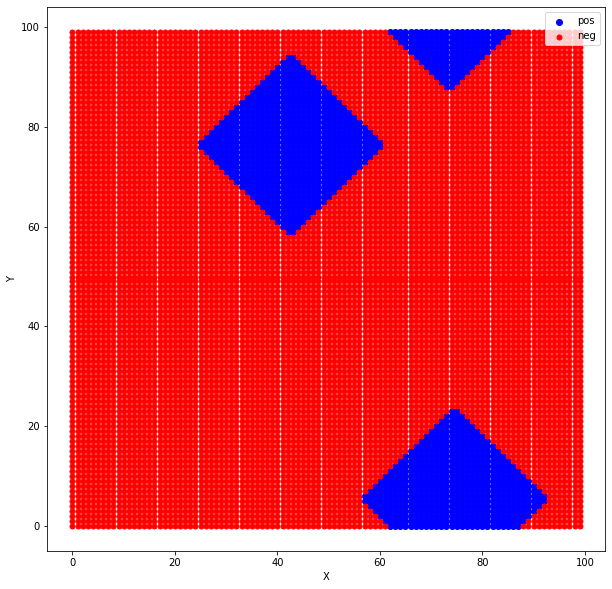

In [40]:
plot_bact2D(bact)